In [1]:
from rectify import rectify_imgs, make_disparity_map
import cv2
from random import random
from matplotlib import pyplot as plt

In [2]:
INPUT_DIR = '../data/stereo_images/TEST'
CALIBRATION_DIR = '../data/stereo_images/scenes/calibration_results'
BASELINE = 0.06

Processing ../data/stereo_images/TEST/raw/2.png


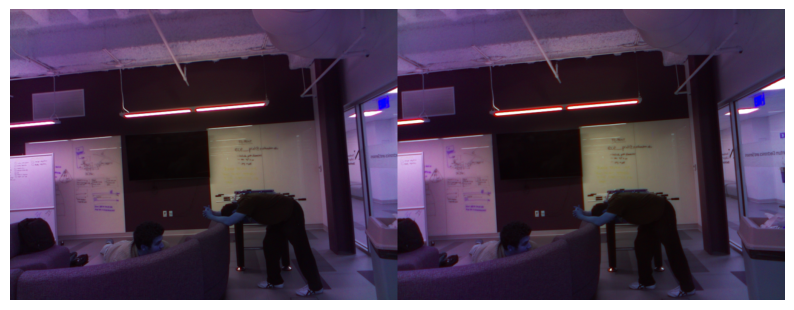

In [3]:
file_num = int(random() * 10) + 1
selected_file = f'{INPUT_DIR}/raw/{file_num}.png'
print(f'Processing {selected_file}')
image = cv2.imread(selected_file)

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.gcf().set_size_inches(10, 10)  # Set the figure size to make the image larger
plt.show()

In [4]:
left = cv2.imread(f'{INPUT_DIR}/left/{file_num}.png')
right = cv2.imread(f'{INPUT_DIR}/right/{file_num}.png')

In [5]:
if left is not None and right is not None:
	left_rectified, right_rectified, Q, focal_length = rectify_imgs(left, right, CALIBRATION_DIR)
else:
	print("Error: One or both of the images are not loaded correctly.")

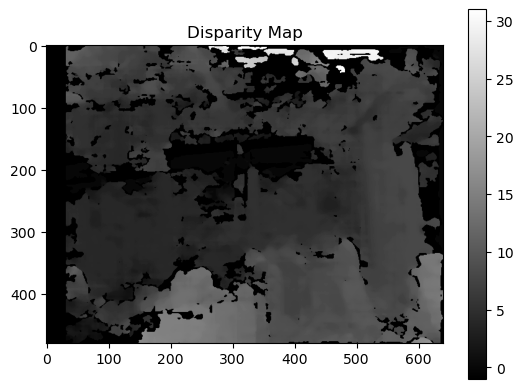

In [6]:
min_disp = 0
num_disp = 16 * 2
block_size = 10
disparity_map = make_disparity_map(left_rectified, right_rectified, min_disp, num_disp, block_size)

# Display disparity map
plt.imshow(disparity_map, 'gray')
plt.title("Disparity Map")
plt.colorbar()
plt.show()


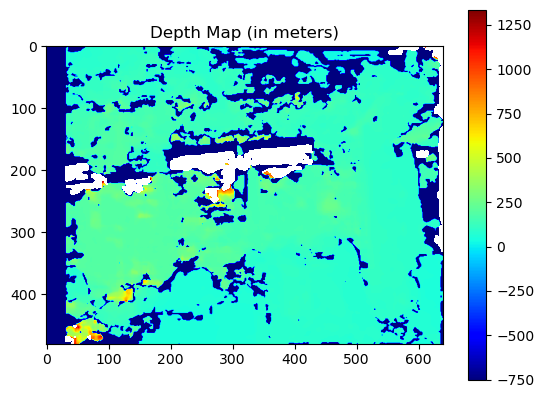

In [7]:

# Step 4: Convert Disparity Map to Depth Map
depth_map = cv2.reprojectImageTo3D(disparity_map, Q)

# Function to handle mouse click event
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # Get the coordinates where the user clicked
        x, y = int(event.xdata), int(event.ydata)

        # Ensure the clicked point is within bounds of the image
        if 0 <= x < depth_map.shape[1] and 0 <= y < depth_map.shape[0]:
            # Check if disparity value is valid
            if disparity_map[y, x] > min_disp:
                # Get depth (z-coordinate)
                distance = depth_map[y, x, 2]
                print(f"Distance at point ({x}, {y}): {distance:.2f} meters")
            else:
                print(f"No valid disparity at point ({x}, {y})")
        else:
            print(f"Clicked point ({x}, {y}) is out of bounds.")

# Display the Depth Map
fig, ax = plt.subplots()
depth_display = ax.imshow(depth_map[:, :, 2], 'jet')  # Z values represent the depth
plt.colorbar(depth_display)
plt.title("Depth Map (in meters)")

# Connect the click event to the handler
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()
